In [1]:
set.seed(1234)
install.packages("kknn")
library(tidyverse)
library(tidymodels)
library(kknn)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

In [2]:
read_athlete<-read_csv("https://raw.githubusercontent.com/Mahekbhardwaj/dsci-private/main/athlete_events_full.csv?token=GHSAT0AAAAAACLEYHGYHX6A54663XLPUTJAZLSOYLQ")
head(read_athlete)
tail(read_athlete)

Rows: 99999 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal
dbl  (5): ID, Age, Height, Weight, Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
50600,Huang Chung-Yi,M,36,174,85,Chinese Taipei,TPE,2004 Summer,2004,Summer,Athina,Baseball,Baseball Men's Baseball,NA
50601,"Yao Xi ""Crystal"" Huang",F,29,160,50,United States,USA,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Singles,NA
50601,"Yao Xi ""Crystal"" Huang",F,29,160,50,United States,USA,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Team,NA
50602,Huang Cunguang,M,26,172,75,China,CHN,2012 Summer,2012,Summer,London,Canoeing,"Canoeing Men's Kayak Singles, Slalom",NA
50603,Huang Dongjie,F,26,175,67,China,CHN,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,NA
50604,Huang Dongyan,F,22,172,63,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,Cycling Women's Team Pursuit,NA


In [3]:
#choosing a sport- we chose athletics
sports<-read_athlete|> group_by(Sport) |> summarize(count=n()) 
head(sports)
tail(sports)

Sport,count
<chr>,<int>
Alpine Skiing,3493
Alpinism,7
Archery,830
Art Competitions,1445
Athletics,14678
Badminton,455


Sport,count
<chr>,<int>
Triathlon,205
Tug-Of-War,62
Volleyball,1149
Water Polo,1472
Weightlifting,1355
Wrestling,2552


In [4]:
#selecting only athletics sport
athlete<-read_athlete|> filter(Sport=="Athletics",Year==2016)
athlete<-na.omit(athlete)
head(athlete)
tail(athlete)

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
846,Valerie Kasanita Adams-Vili (-Price),F,31,193,120,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1561,Mobolade Abimbola Ajomale,M,20,180,62,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,Bronze
1682,Morolake Akinosun,F,22,163,61,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Gold
2695,Nia Sifaatihii Ali,F,27,170,65,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,Silver
4782,Hirooki Arai,M,28,180,62,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 50 kilometres Walk,Bronze
5542,"Geraldina Rachel ""Dina"" Asher-Smith",F,20,164,55,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Bronze


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
46275,Christoph Harting,M,26,207,120,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Discus Throw,Gold
46542,Natasha Monique Hastings,F,30,173,68,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 400 metres Relay,Gold
46861,Akeem Haynes,M,24,170,73,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,Bronze
47578,"Jeffrey ""Jeff"" Henderson",M,27,183,86,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Long Jump,Gold
47736,Desiree Latifah N. Henry,F,20,171,64,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Bronze
48858,Sophie Hitchon,F,25,170,75,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Hammer Throw,Bronze


In [5]:
#number of times each person has been to olympics
olymp_num<- athlete|> group_by(ID,Name,Age,Height,Weight) |> summarize(olympics_events_attended=n()) 
olymp_num

`summarise()` has grouped output by 'ID', 'Name', 'Age', 'Height'. You can
override using the `.groups` argument.


ID,Name,Age,Height,Weight,olympics_events_attended
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
846,Valerie Kasanita Adams-Vili (-Price),31,193,120,1
1561,Mobolade Abimbola Ajomale,20,180,62,1
1682,Morolake Akinosun,22,163,61,1
2695,Nia Sifaatihii Ali,27,170,65,1
4782,Hirooki Arai,28,180,62,1
5542,"Geraldina Rachel ""Dina"" Asher-Smith",20,164,55,1
5561,Nickel Ashmeade,26,183,77,1
6204,Almaz Ayana Eba,24,166,47,2
6912,Kemar Bailey-Cole,24,193,84,1


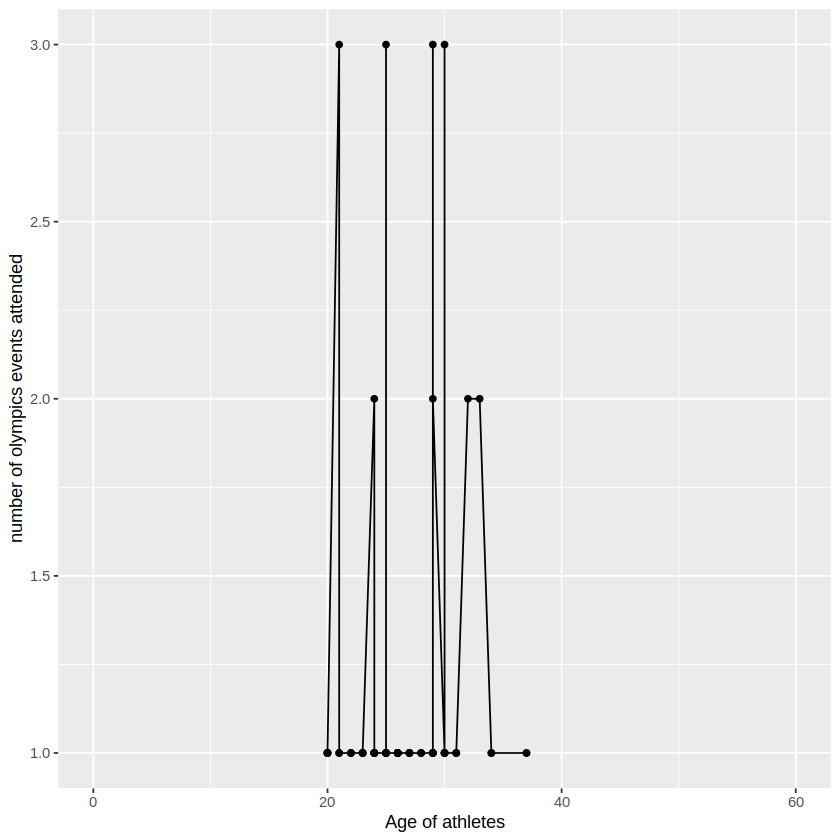

In [6]:
#plot of age vs number of olympic events attended
event_age_plot<-olymp_num|>
                ggplot(aes(y=olympics_events_attended,x=Age)) +
                geom_point()+ geom_line()+ xlim(0,60)+
                labs(y="number of olympics events attended",x="Age of athletes")
event_age_plot

In [7]:
#number of medals won per athlete
#indexing NA and non-NA values in Medal column to 0 and 1 medals won respectively
athlete$Medal <- ifelse(!is.na(athlete$Medal), 1, athlete$Medal)
head(athlete)
tail(athlete)

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
846,Valerie Kasanita Adams-Vili (-Price),F,31,193,120,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,1
1561,Mobolade Abimbola Ajomale,M,20,180,62,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,1
1682,Morolake Akinosun,F,22,163,61,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,1
2695,Nia Sifaatihii Ali,F,27,170,65,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,1
4782,Hirooki Arai,M,28,180,62,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 50 kilometres Walk,1
5542,"Geraldina Rachel ""Dina"" Asher-Smith",F,20,164,55,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,1


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
46275,Christoph Harting,M,26,207,120,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Discus Throw,1
46542,Natasha Monique Hastings,F,30,173,68,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 400 metres Relay,1
46861,Akeem Haynes,M,24,170,73,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,1
47578,"Jeffrey ""Jeff"" Henderson",M,27,183,86,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Long Jump,1
47736,Desiree Latifah N. Henry,F,20,171,64,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,1
48858,Sophie Hitchon,F,25,170,75,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Hammer Throw,1


In [8]:
athlete_average<- athlete|> group_by(ID,Age,Height,Weight)|> summarize(medalcount = n_distinct(Medal,na.rm = TRUE)) 
head(athlete_average)
tail(athlete_average)

`summarise()` has grouped output by 'ID', 'Age', 'Height'. You can override
using the `.groups` argument.


ID,Age,Height,Weight,medalcount
<dbl>,<dbl>,<dbl>,<dbl>,<int>
846,31,193,120,1
1561,20,180,62,1
1682,22,163,61,1
2695,27,170,65,1
4782,28,180,62,1
5542,20,164,55,1


ID,Age,Height,Weight,medalcount
<dbl>,<dbl>,<dbl>,<dbl>,<int>
46275,26,207,120,1
46542,30,173,68,1
46861,24,170,73,1
47578,27,183,86,1
47736,20,171,64,1
48858,25,170,75,1


In [9]:
#exploratory analysis- creating a table to find the average number of medals won by each age of athelete
#converting medal col to int type
athlete$Medal <- as.integer(athlete$Medal)
athlete_medal<-athlete_average|>
                group_by(Age)|>
                summarize(meanmedalcount=mean(medalcount))
head(athlete_medal)
tail(athlete_medal)

Age,meanmedalcount
<dbl>,<dbl>
20,1
21,1
22,1
23,1
24,1
25,1


Age,meanmedalcount
<dbl>,<dbl>
30,1
31,1
32,1
33,1
34,1
37,1


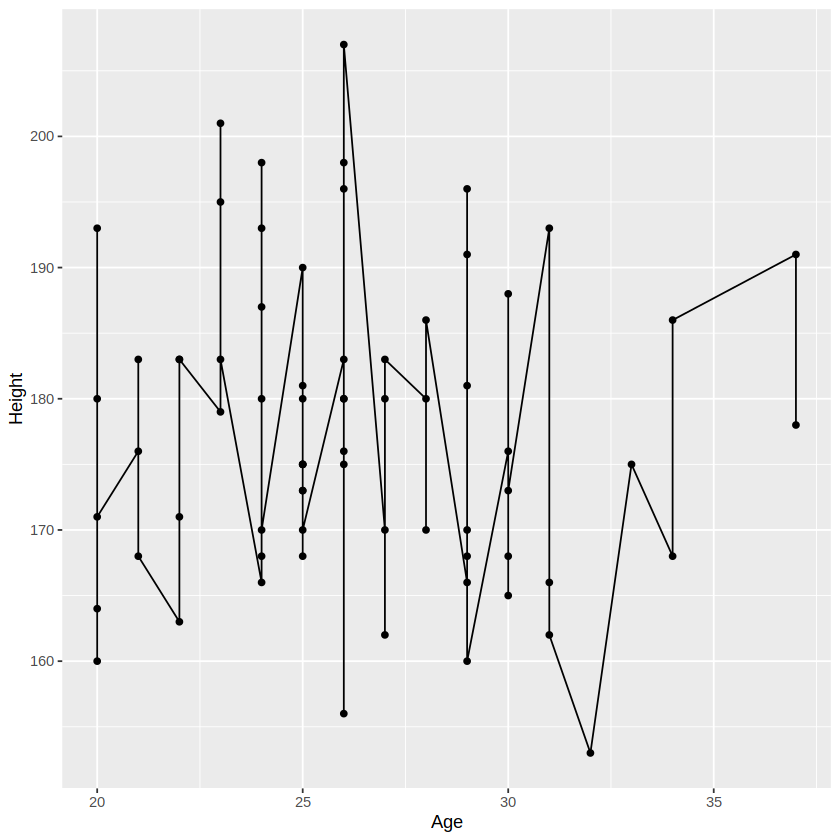

In [10]:
#looking at plots for height vs age and weight vs age
age_height_plot<-athlete_average|>
                ggplot(aes(y=Height,x=Age)) +
                geom_point()+ geom_line()+
                labs(y="Height",x="Age")
age_height_plot 

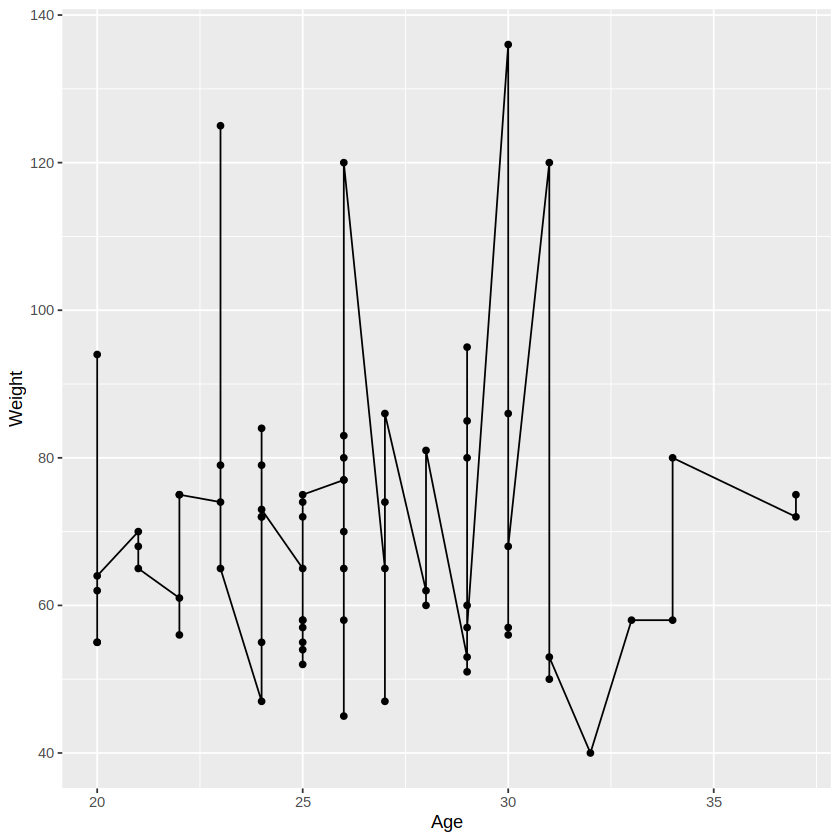

In [11]:
age_weight_plot<-athlete_average|>
                ggplot(aes(y=Weight,x=Age)) +
                geom_point()+ geom_line()+
                labs(y="Weight",x="Age")
age_weight_plot

In [12]:
#now that exploratory analysis is done, we split the data into training and test sets.
mutate(athlete_average,Age=as_factor(Age))
athlete_split <- initial_split(athlete_average, prop = 0.75, strata = Age)
athlete_train <- training(athlete_split)
athlete_test <- testing(athlete_split)

ID,Age,Height,Weight,medalcount
<dbl>,<fct>,<dbl>,<dbl>,<int>
846,31,193,120,1
1561,20,180,62,1
1682,22,163,61,1
2695,27,170,65,1
4782,28,180,62,1
5542,20,164,55,1
5561,26,183,77,1
6204,24,166,47,1
6912,24,193,84,1


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


In [13]:
#choosing k for knn regression using cross validation
ath_recipe <- recipe(Age ~ Height,Weight,medalcount, data = athlete_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

ath_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
                              set_engine("kknn") |>
                              set_mode("regression")

ath_vfold <- vfold_cv(athlete_train, v = 5, strata = Age)

ath_wkflw <- workflow() |>
  add_recipe(ath_recipe) |>
  add_model(ath_spec)

ath_wkflw

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 2 breaks instead.”


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [14]:
gridvals <- tibble(neighbors = seq(from = 1, to = 40))

ath_results <- ath_wkflw |>
  tune_grid(resamples = ath_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

ath_results

! Fold1: preprocessor 1/1, model 1/1: 40 samples were requested but there were 40 rows in the data. 35 will be...

! Fold2: preprocessor 1/1, model 1/1: 40 samples were requested but there were 40 rows in the data. 35 will be...

! Fold3: preprocessor 1/1, model 1/1: 40 samples were requested but there were 41 rows in the data. 36 will be...

! Fold4: preprocessor 1/1, model 1/1: 40 samples were requested but there were 41 rows in the data. 36 will be...

! Fold5: preprocessor 1/1, model 1/1: 40 samples were requested but there were 42 rows in the data. 37 will be...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,5.042467,5,0.3988604,Preprocessor1_Model01
2,rmse,standard,4.945363,5,0.5250791,Preprocessor1_Model02
3,rmse,standard,4.506362,5,0.7082486,Preprocessor1_Model03
4,rmse,standard,4.708288,5,0.5514576,Preprocessor1_Model04
5,rmse,standard,4.379320,5,0.5630204,Preprocessor1_Model05
6,rmse,standard,4.159964,5,0.4662033,Preprocessor1_Model06
7,rmse,standard,4.049928,5,0.4692632,Preprocessor1_Model07
8,rmse,standard,4.003312,5,0.4810312,Preprocessor1_Model08
9,rmse,standard,4.005678,5,0.4504740,Preprocessor1_Model09


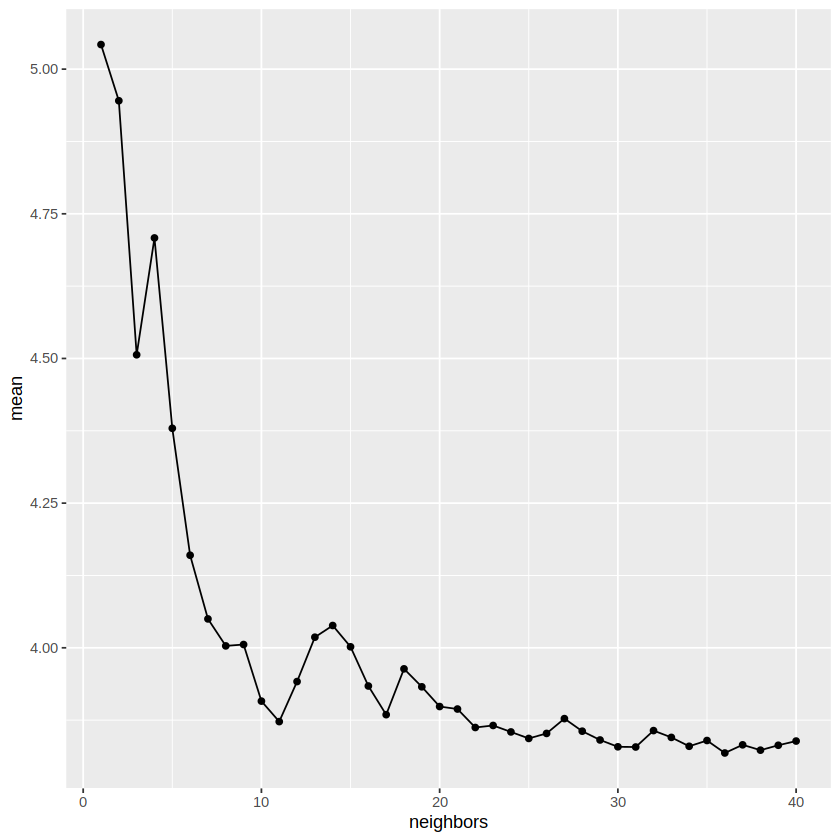

In [15]:
mean_neighbor_plot<-ath_results|>
                ggplot(aes(y=mean,x=neighbors)) +
                geom_point()+ geom_line()+
                labs(y="mean",x="neighbors")
mean_neighbor_plot 

In [26]:
#according to the graph, the optimal value for k should be 6
ath_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
  set_engine("kknn") |>
  set_mode("regression")

ath_fit <- workflow() |>
  add_recipe(ath_recipe) |>
  add_model(ath_spec) |>
  fit(data = athlete_train)

ath_summary <- ath_fit |>
  predict(athlete_test) |>
  bind_cols(athlete_test) |>
  metrics(truth = Age, estimate = .pred) |>
  filter(.metric == 'rmse')

ath_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.16807


In [27]:
#predicting using test dataset
ath_predictions <- predict(ath_fit, athlete_test) |>
  bind_cols(athlete_test)
ath_predictions

.pred,ID,Age,Height,Weight,medalcount
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
26.16667,1561,20,180,62,1
24.16667,2695,27,170,65,1
26.16667,5542,20,164,55,1
24.66667,15460,24,198,79,1
25.50000,17300,25,175,55,1
26.33333,17755,34,168,58,1
25.50000,20133,25,175,57,1
26.33333,25807,29,168,51,1
26.16667,27488,26,180,58,1


In [28]:
#looking at error metrics
ath_predictions |>
  metrics(truth =Age, estimate =.pred) 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.168069939
rsq,standard,0.003422919
mae,standard,3.026315789
